# Author : Loka Akash Reddy

# Technical Task-2 : Prediction using Unsupervised Machine Learning

# GRIP @ The Sparks Foundation

# From the given ‘Iris’ dataset, we will predict the optimum number of clusters and represent it visually.

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

##  Reading the dataset

In [2]:
df = pd.read_csv(r'Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Finding the correlation between the features

In [9]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Checking outliers

<AxesSubplot:xlabel='SepalLengthCm'>

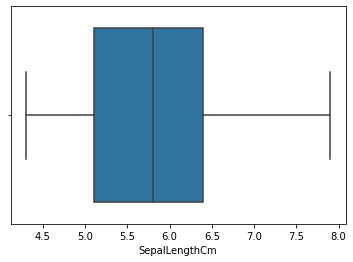

In [10]:
sns.boxplot(x=df['SepalLengthCm'])

## Visualizing the dataset

<AxesSubplot:>

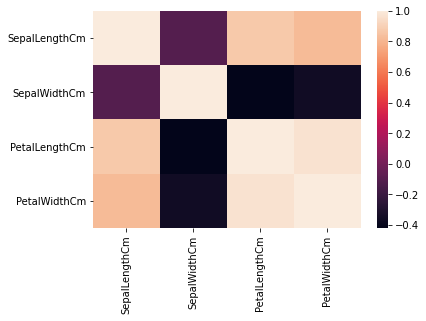

In [11]:
# Visualizing the correlation between the features
sns.heatmap(df.corr())

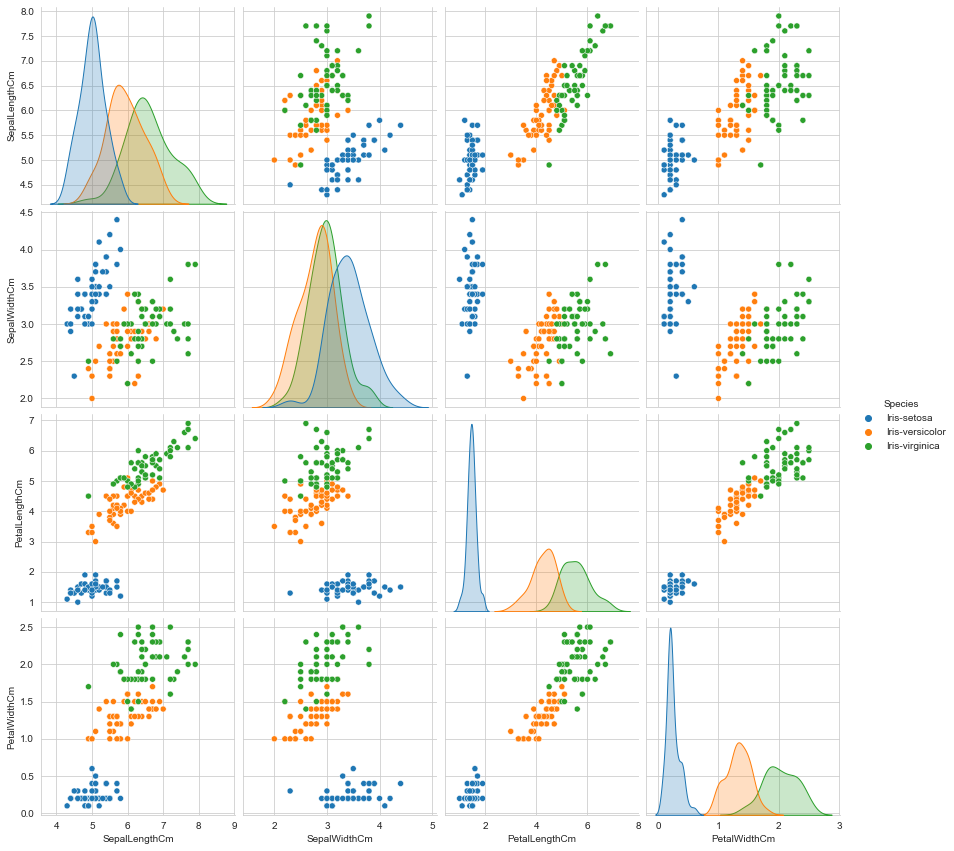

In [12]:
#Visualizing clearly about sample relation between features
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", height=3);
plt.show()

## Finding the number of clusters using Elbow method

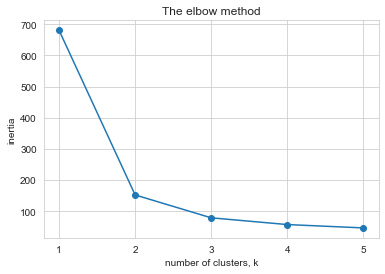

In [13]:
from sklearn.cluster import KMeans
ks = range(1, 6)
inertias = []
x = df.iloc[:, [0, 1, 2, 3]].values
for k in ks:
    
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('The elbow method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### From the above graph, we choose the cluster where inertia doesn't decrease significantly with every iteration.

### From this we choose the number of clusters as 3, we can also use Hierarchical clustering to get number of cluster to be used

## Training the model

In [14]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(x)

KMeans(n_clusters=3)

## Visualzing the clustering on the data

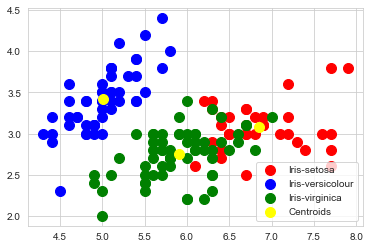

In [15]:
# Calculate the cluster labels: labels
labels = kmeans.predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Validating the model

In [16]:
# Create a DataFrame with labels and species as columns: df
df2 = pd.DataFrame({'labels':labels,'species':df['Species']})

# Create crosstab: ct
ct = pd.crosstab(df2['labels'],df2['species'])

print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0                2              36
1                 50                0               0
2                  0               48              14


In [17]:
# Perform the necessary imports
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = Normalizer()

x = scaler.fit_transform(x)

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
kmeans.fit(x)

KMeans(n_clusters=3)

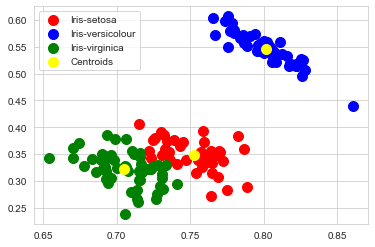

In [18]:
# Calculate the cluster labels: labels
labels = kmeans.predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [19]:
# Create a DataFrame with labels and species as columns: df
df2 = pd.DataFrame({'labels':labels,'species':df['Species']})

# Create crosstab: ct
ct = pd.crosstab(df2['labels'],df2['species'])

# Display ct
print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               45               0
1                 50                0               0
2                  0                5              50


### Therefore we can see the effect of doing normalize on data and the clustering has been improved compared to unnormalized data. 

## TASK COMPLETED